# Uvod u dimenzionalnu redukciju: PCA

U praksi se često susrećemo sa podatcima koji su visokodimenzionalni, odnosno zapisani kao n-torke brojeva (za neki veliki n). Nisu sve dimenzije jednako važne. Primjerice, ako su nam podatci distribuirani usko oko ravnine u $\mathbb{R}^3$ (ali ne leže nužno na ravnini zbog nasumičnosti), onda ne gubimo puno ako projiciramo podatke na ravninu. Dakle, one smjerove duž kojih je varijanca malena možemo zanemariti. Ovo je ideja iza jednog od najpoznatijih algoritama za dimenzionalnu redukciju - analizu glavnih komponenti (*principal component analysis*) ili **PCA**.

## Kovarijanca

Prisjetimo se definicije kovarijance. Neka su $X, Y: \Omega \rightarrow \mathbb{R}$ slučajne varijable i $\mathbb{E}[X]=\int_\Omega X dP$ očekivana vrijednost, onda $cov(X,Y)=\mathbb{E}
[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])]=\mathbb{E}[XY]-\mathbb{E}[X]\mathbb{E}[Y]$. Naravno imamo $cov(X,Y)=cov(Y,X)$ i varijanca je samo $var(X)=cov(X,X)$.

Ideja je da $cov(X,Y)$ govori o međusobnoj relaciji između $X$ i $Y$. Radi jednostavnosti pretpostavimo da smo centrirani u 0, tj. da su $\mathbb{E}[X]=\mathbb{E}[Y]=0$. Ako je $cov(X,Y)=\mathbb{E}[XY]$ pozitivan, onda kada je $X$ pozitivan i $Y$ mora (u prosjeku) biti pozitivan, a kada je $X$ negativan, $Y$ (u prosjeku) mora biti negativan pa podatci imaju generalni oblik koji raste slijeva nadesno. Primjerice:

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [87]:
mean=[0,0]
cov1=np.array([[2, 1], [1, 1]]) #positive correlation
cov2=np.array([[2, -1], [-1, 1]]) #negative correlation

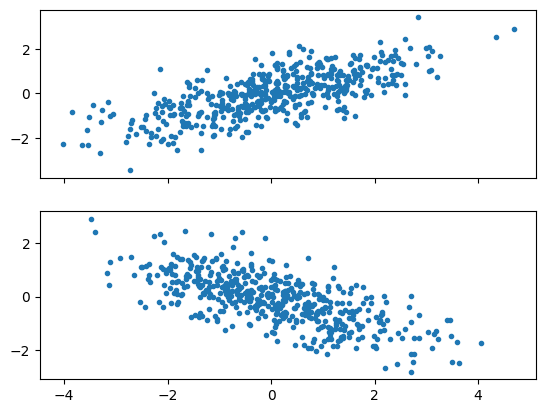

In [88]:
x1, y1 = np.random.multivariate_normal(mean, cov1, 500).T
x2, y2 = np.random.multivariate_normal(mean, cov2, 500).T

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x1, y1, '.')
axarr[1].plot(x2, y2, '.')

plt.show()


Matrica kovarijanci
$$
\Sigma=
\left( \begin{matrix}
var(X) & cov(X,Y) \\
cov(X,Y) & var(Y)
\end{matrix} \right)
$$
onda transformira podatke koji nemaju nikakvu ovisnost (npr. normalno su raspoređeni $cov(X,Y)=0$, $\ var(X)=var(Y)=1$):

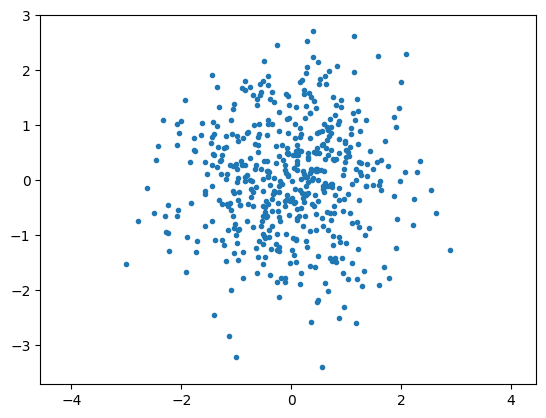

In [89]:
id=[[1, 0], [0, 1]]
x, y = np.random.multivariate_normal(mean, id, 500).T

plt.plot(x, y, '.')

plt.axis('equal')

plt.show()

u podatke koji imaju međusobnu ovisnost (kovarijancu):

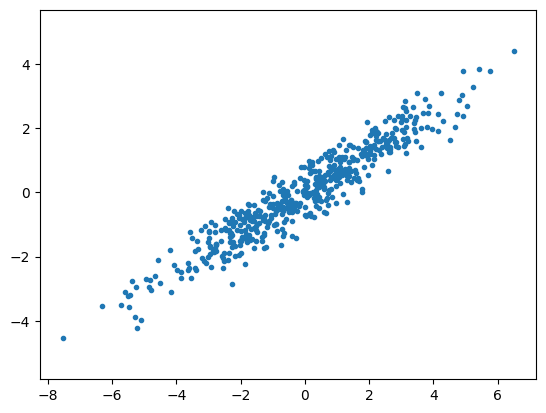

In [90]:
for i in range(x.size):
  v=np.array([x[i], y[i]])
  v_tr=cov1@v
  x[i]=v_tr[0]
  y[i]=v_tr[1]

plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

Neka je sada dan vektor slučajnih varijabli $X=(X_1,...,X_n)$. Za vektor $Y=(Y_1,...,Y_n)$ opet možemo definirati matricu kovarijanci $\Sigma_{ij} = cov(X_i,Y_j)$.

## Algoritam

PCA traži međusobno ortogonalne pravce na kojima $X$ ima najveću varijancu. Primjerice, za $X=(X_1,X_2)$ koji su normalno raspoređeni kao prije:

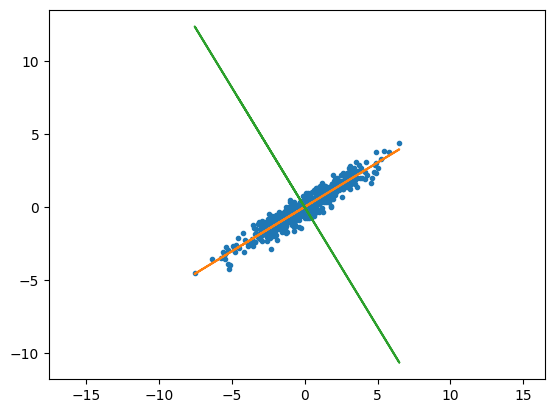

In [91]:
plt.plot(x, y, '.')

plt.axis('equal')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot
plt.plot(x, m*x+b)

#plot line orthogonal to regression line
plt.plot(x, (-1/m)*x+b)

Podatci su uglavnom raspoređeni duž narančaste linije i ne gubimo puno informacija ako ih projiciramo na narančastu liniju, ali gubimo značajnu količinu informacija ako ih projiciramo na zelenu liniju (puno podataka će se projicirati u vrlo bliske točke, tj. prestat ćemo ih razlikovati kao dva različita podatka).

Učinimo ovu intuiciju preciznijom. Neka je $a=(a_1,...,a_n)$ neki vektor i $x\mapsto a^Tx=\sum_ia_ix_i$ pripadajući mu funkcional. Definiramo slučajnu varijablu $Z=a^TX=\sum_ia_iX_i$ i tražimo $a$ takav da je $var(Z)$ maksimalan. Naime, primijetimo da je $(a_1,...,a_n)$ normala na hiperravninu određenu jezgrom funkcionala $ker(x\mapsto a^Tx)=\{x\in\mathbb{R}^n \ \vert \ a^Tx=0\}$  pa funkcional samo ortogonalno projicira na vektor $a$ (ubije sve komponente koje leže na ravnini), a mi pokušavamo maksimizirati varijancu te projekcije (tako da su nam podatci maksimalno raspršeni).

Postavljamo uvjet $\left|| a|\right|=a^Ta=1$ jer nas samo zanima smjer (a ne i veličina vektora $a$) i uostalom ako učinimo $a$ većim i $Z$ postaje veći. Kada pronađemo prvi vektor $a_1$, onda drugi $a_2$ tražimo tako da zahtijevamo nekoreliranost sa prvim. Općenito definiramo $Z_k=a_k^TX$ i tražimo da je $var(Z_k)$ maksimalan pod uvjetom da $cov(Z_k, Z_l)=0$ (za sve $l< k$) i $a_k^Ta_k=1$.

Ovo se lagano riješi metodom Lagrangeovih multiplikatora. Prvo primijetimo da $cov(a^TX,b^TY)=cov(\sum_ia_iX_i,\sum_jb_jY_j)=\sum_{ij}a_ib_jcov(X_i,Y_j)=a^T\Sigma b$ pa $var(a^TX)=a^T\Sigma a$. Dakle, prvo maksimiziramo $a^T\Sigma a$ pod uvjetom $\left| | a | \right|=1$. Ovo je standardni problem i lako se pokaže da $a$ mora biti svojstveni vektor matrice $\Sigma$. Ukratko, znamo da moramo maksimizirati lagranžijan $a^T \Sigma a- \lambda (a^Ta-1)$. Dakle, deriviranjem po $a$ (tj. svakoj koordinati $a_i$) u maksimumu moramo imati 0, a kada sredimo izraz vidimo da imamo vektorsku jednadžbu $\Sigma a-\lambda a=0$, iz čega slijedi da je $a$ svojstveni vektor, a $\lambda$ najveća svojstvena vrijednast od $\Sigma$. Primijetimo da je upravo $var(a^TX)=a^T\Sigma a=a^T \lambda a=\lambda a^Ta=\lambda$. Ovim smo pronašli $a_1$ i $\lambda_1$ - smjer sa najvećom varijancom.

Dalje, $a_2$ i $\lambda_2$ tražimo pod zahtjevom $cov(a_2^X,a_1^TX)=0$, što se svede na $0=a_2^T\Sigma a_1= a_2^T\lambda_1 a_1=\lambda_1 a_2^Ta_1$. Vidimo da je nekoreliranost ispunjena kadgod su $a_1$ i $a_2$ međusobno okomiti. Kada je $a_1$ u jezgri matrice kovarijanci, ($\lambda_1=0$), onda je naravno nekoreliranost automatski zadovoljena pa ćemo zahtijevati međusobnu ortogonalnost. Sada je jasno da se moramo ograničiti na prostor ortogonalan $a_1$ i ponoviti postupak, što nam daje drugi svojstveni vektor $a_2$ i pripadajuću svojstvenu vrijednost $\lambda_2$. Nastavimo li induktivno, dobit ćemo niz svojstvenih vektora $a_k$ od $\Sigma$ koji su poredani po veličini njihovih svojstvenih vrijednosti $\lambda_k=var(a_k^TX)$. Te svojstvene vektore nazivamo **glavnim (ili principijelnim) komponentama**.

## Demonstracija

PCA algoritam uzima prirodni broj $k \leq n$ i vrati prvih (najvećih) $k$ principijalnih komponenti. Implementiran je u paketu *scikit-learn* (sklearn).

In [80]:
import pandas as pd #dataframe stuff
#iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [81]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Separiramo target od ostalih svojstava (features)

In [82]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = ['target']
# Separating out the features/target
x = df.loc[:, features].values
y = df.loc[:, target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Sada primjenjujemo PCA na naš dataframe (svojstava). Radi vizualizacije uzimamo samo prve dvije komponente

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Vraćamo natrag target u dataframe

In [84]:
#final dataframe
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [85]:
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Konačno, možemo plotati rezultat

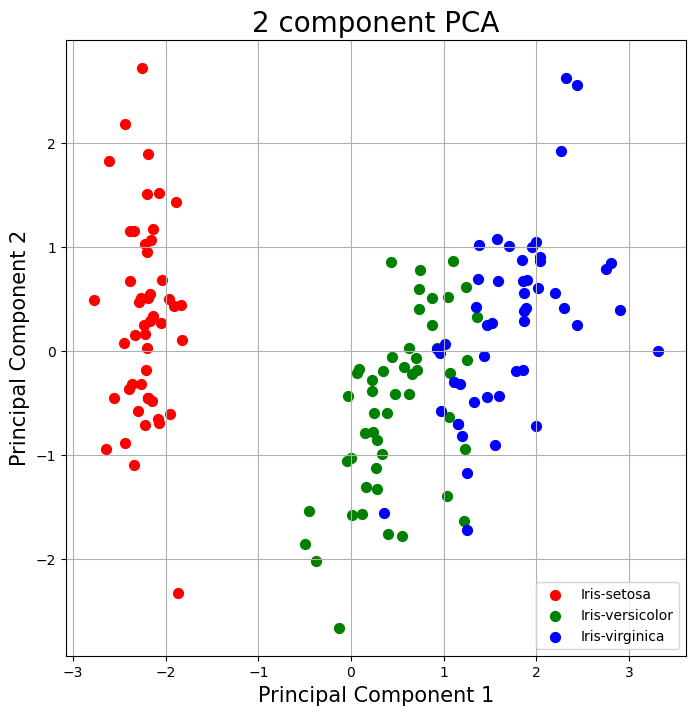

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Vidimo da nam se versicolor i virginica podatci miješaju. Moguće je da postoji preklapanja i u originalnom 4D prostoru iz kojeg smo projicirali na ravninu najveće dvije principijalne komponente, ali kakva god situacija bila, preklapanja su na projekciji još izraženija. Ovo je pogotovo problem kada podatci uopće nisu linearno distribuirani.

# Manifold Learning

PCA algoritam je linearan - funkcionira dobro ako su podatci distribuirani duž linearnih potprostora. Što ako su nam podatci distribuirani duž nekakve zakrivljene površine? U tom slučaju koristimo nelinearnu dimenzionalnu redukciju. Pretežito se pretpostavlja da podatci leže na nekoj nižedimenzionalnoj glatkoj mnogostrukosti te se ta mnogostrukost (tj. njena parametrizacija) pokušava naučiti, stoga se ovaj problem zove još i *manifold learning*.

Osnovnu teoriju glatkih mnogostrukosti nećemo razvijati ovdje. Pretpostavljamo da čitatelj zna što su mnogostrukosti (općenito glatke i Riemmanove), što su diferencijalne forme te kako integrirati iste te vršiti razne operacije na njima (Liejeva, vanjska derivacija, kontrakcija i sl.). Pretpostavit ćemo i poznavanje osnovnih topoloških pojmova (kompaktnost, povezanost...) te (za Laplacian eigenmaps algoritam) i osnovnu teoriju Hilbertovih prostora (specifično $L^2(M)$ prostor). Ovo sve je objašnjeno u prilogu - mnogostrukosti i kerneli (za teoriju Hilbertovih prostora).

Za početak bi valjalo rigorozno postaviti problem od interesa. Što to točno znači *naučiti mnogostrukost*?

Ako točke $x_1,...,x_n\in \mathbb{R}^D$ leže na nižedimenzionalnoj ($d$-dim) mnogostrukosti $M$, koja se može pokriti jednom kartom $f: M \rightarrow \mathbb{R}^d$, problem je pronaći $y_1,...,y_n\in \mathbb{R}^d$ tako da $y_i=f(x_i)$ (pokušavamo naučiti kartu $f$ koja globalno opisuje $M$).

Općenito, mnogostrukost ne možemo pokriti jednom (globalnom) kartom, ali se po Whitneyevom teoremu svaka $d$-dim mnogostrukost može smjestiti u $\mathbb{R}^{2d}$. Napomenimo pritom da $2d$ nije za svaku mnogostrukost optimalan - neke se mogu smjestiti u $\mathbb{R}^s$, $d\leq s \leq 2d$.
Primjerice, kružnice ne možemo smjestiti na pravac $\mathbb{R}$, ali možemo u ravninu $\mathbb{R}^2$; sfere ne možemo smjestiti u ravninu $\mathbb{R}^2$, ali možemo u prostor $\mathbb{R}^3$.

Dakle, u općenitom slučaju je problem naučiti to smještenje $f: M\rightarrow\mathbb{R}^s$ (cf. Non-linear Dimensionality Reduction: Riemannian Metric
Estimation and the Problem of Geometric Recovery, Dominique Perrault-Joncas, Marina Meilă). Naravno, smještenje je korisno (smanjuje dimenziju) kada $s<< D$.

Većina algoritama o kojima ćemo govoriti je implementirana u *scikit-learn*

In [ ]:
from sklearn import manifold